This is the Project Proposal for the DSCI 100 Group Project. 
Group members: Artemis, Cathy, Abdulaziz Umiryayev

The title of the project is: Patient Survival Predictor
-> The dataset is drawn from information received from in-hospital mortality for admitted patients.
The model would answer the following predictive question: Based on the foundational characteristics, what are the chances that the admitted patient dies?

-> foundational characteristics would be figured out through trial-and-error method of finding which characteristics have the strongest correlation with the death occurence.

In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(GGally)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:

dataset <- read_csv('data/WineQT.csv')
#renames the columns and gets rid of the spaces
colnames(dataset)<- c('fix_acid','vol_acid','citric_acid','resid_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality','id')
upd <- dataset %>%
         #turns quality variable into a factor
         mutate(quality = as_factor(quality))

#moves ID column at the beginning 
updated_dataset <- upd[,c(13,1,2,3,4,5,6,7,8,9,10,11,12)]
updated_dataset


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [5]:
wine_split <- initial_split(updated_dataset, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_train

id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1591,5.4,0.740,0.09,1.7,0.089,16,26,0.99402,3.67,0.56,11.6,6
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [6]:

            
wine_summarize <- wine_train%>% 
                       group_by(quality)%>%
                       summarise(vol_acid_avg = median(vol_acid), alcohol_avg = median(alcohol), total_sulfur_dioxide_avg = median(total_sulfur_dioxide),sulphates_avg = median(sulphates), density_avg = median(density), count = n())


                        
#the quality distribution falls into the Gaussian normal distribution

#the reason for median is to get 
wine_summarize

`summarise()` ungrouping output (override with `.groups` argument)



quality,vol_acid_avg,alcohol_avg,total_sulfur_dioxide_avg,sulphates_avg,density_avg,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.685,9.475,14.0,0.60,0.997700,4
4,0.670,10.100,31.0,0.57,0.996700,23
5,0.590,9.600,45.5,0.57,0.996800,362
6,0.500,10.500,35.0,0.63,0.996495,348
7,0.360,11.600,28.0,0.75,0.995495,110
8,0.350,11.750,24.0,0.75,0.996200,12


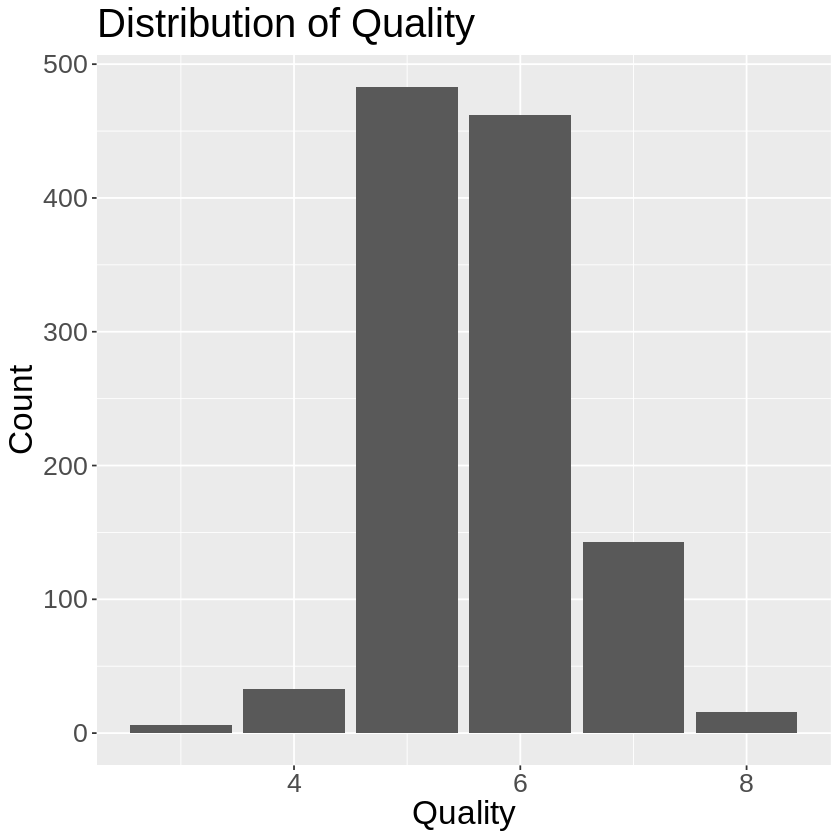

In [7]:
bar_overall <- dataset%>%
                ggplot(aes(x = quality))+
                geom_bar(stat= "count")+
                labs(x = 'Quality', title = "Distribution of Quality", y = "Count")+
                theme(text = element_text(size = 20))
bar_overall

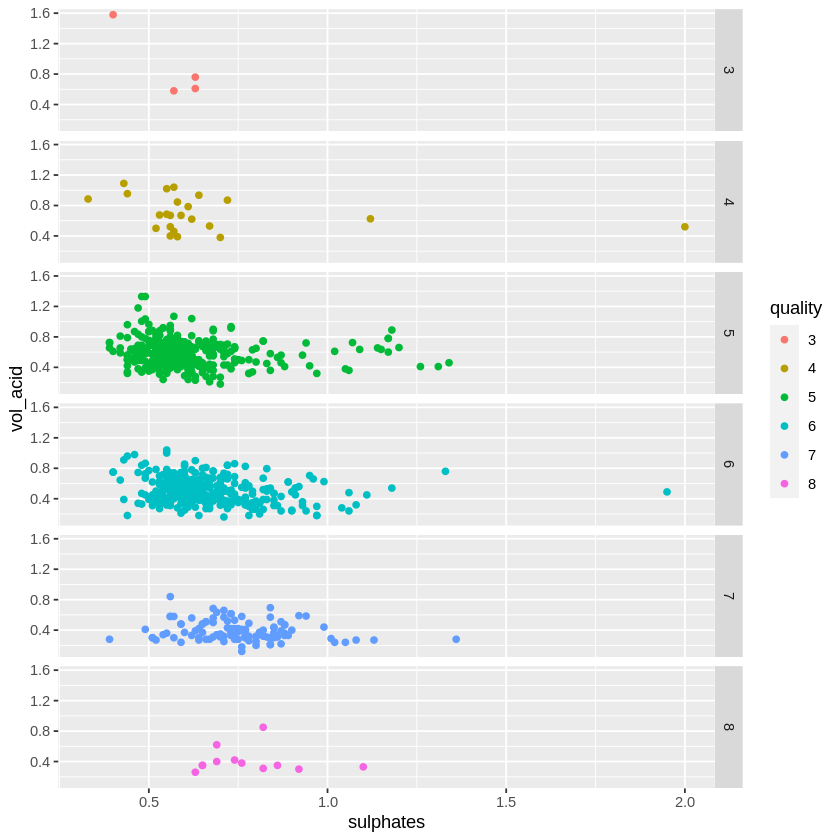

In [8]:
data_visualization <- wine_train %>%
                     ggplot(aes(y = vol_acid, x = sulphates, color = quality))+
                     geom_point()+
                     facet_grid(rows = vars(quality))
data_visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



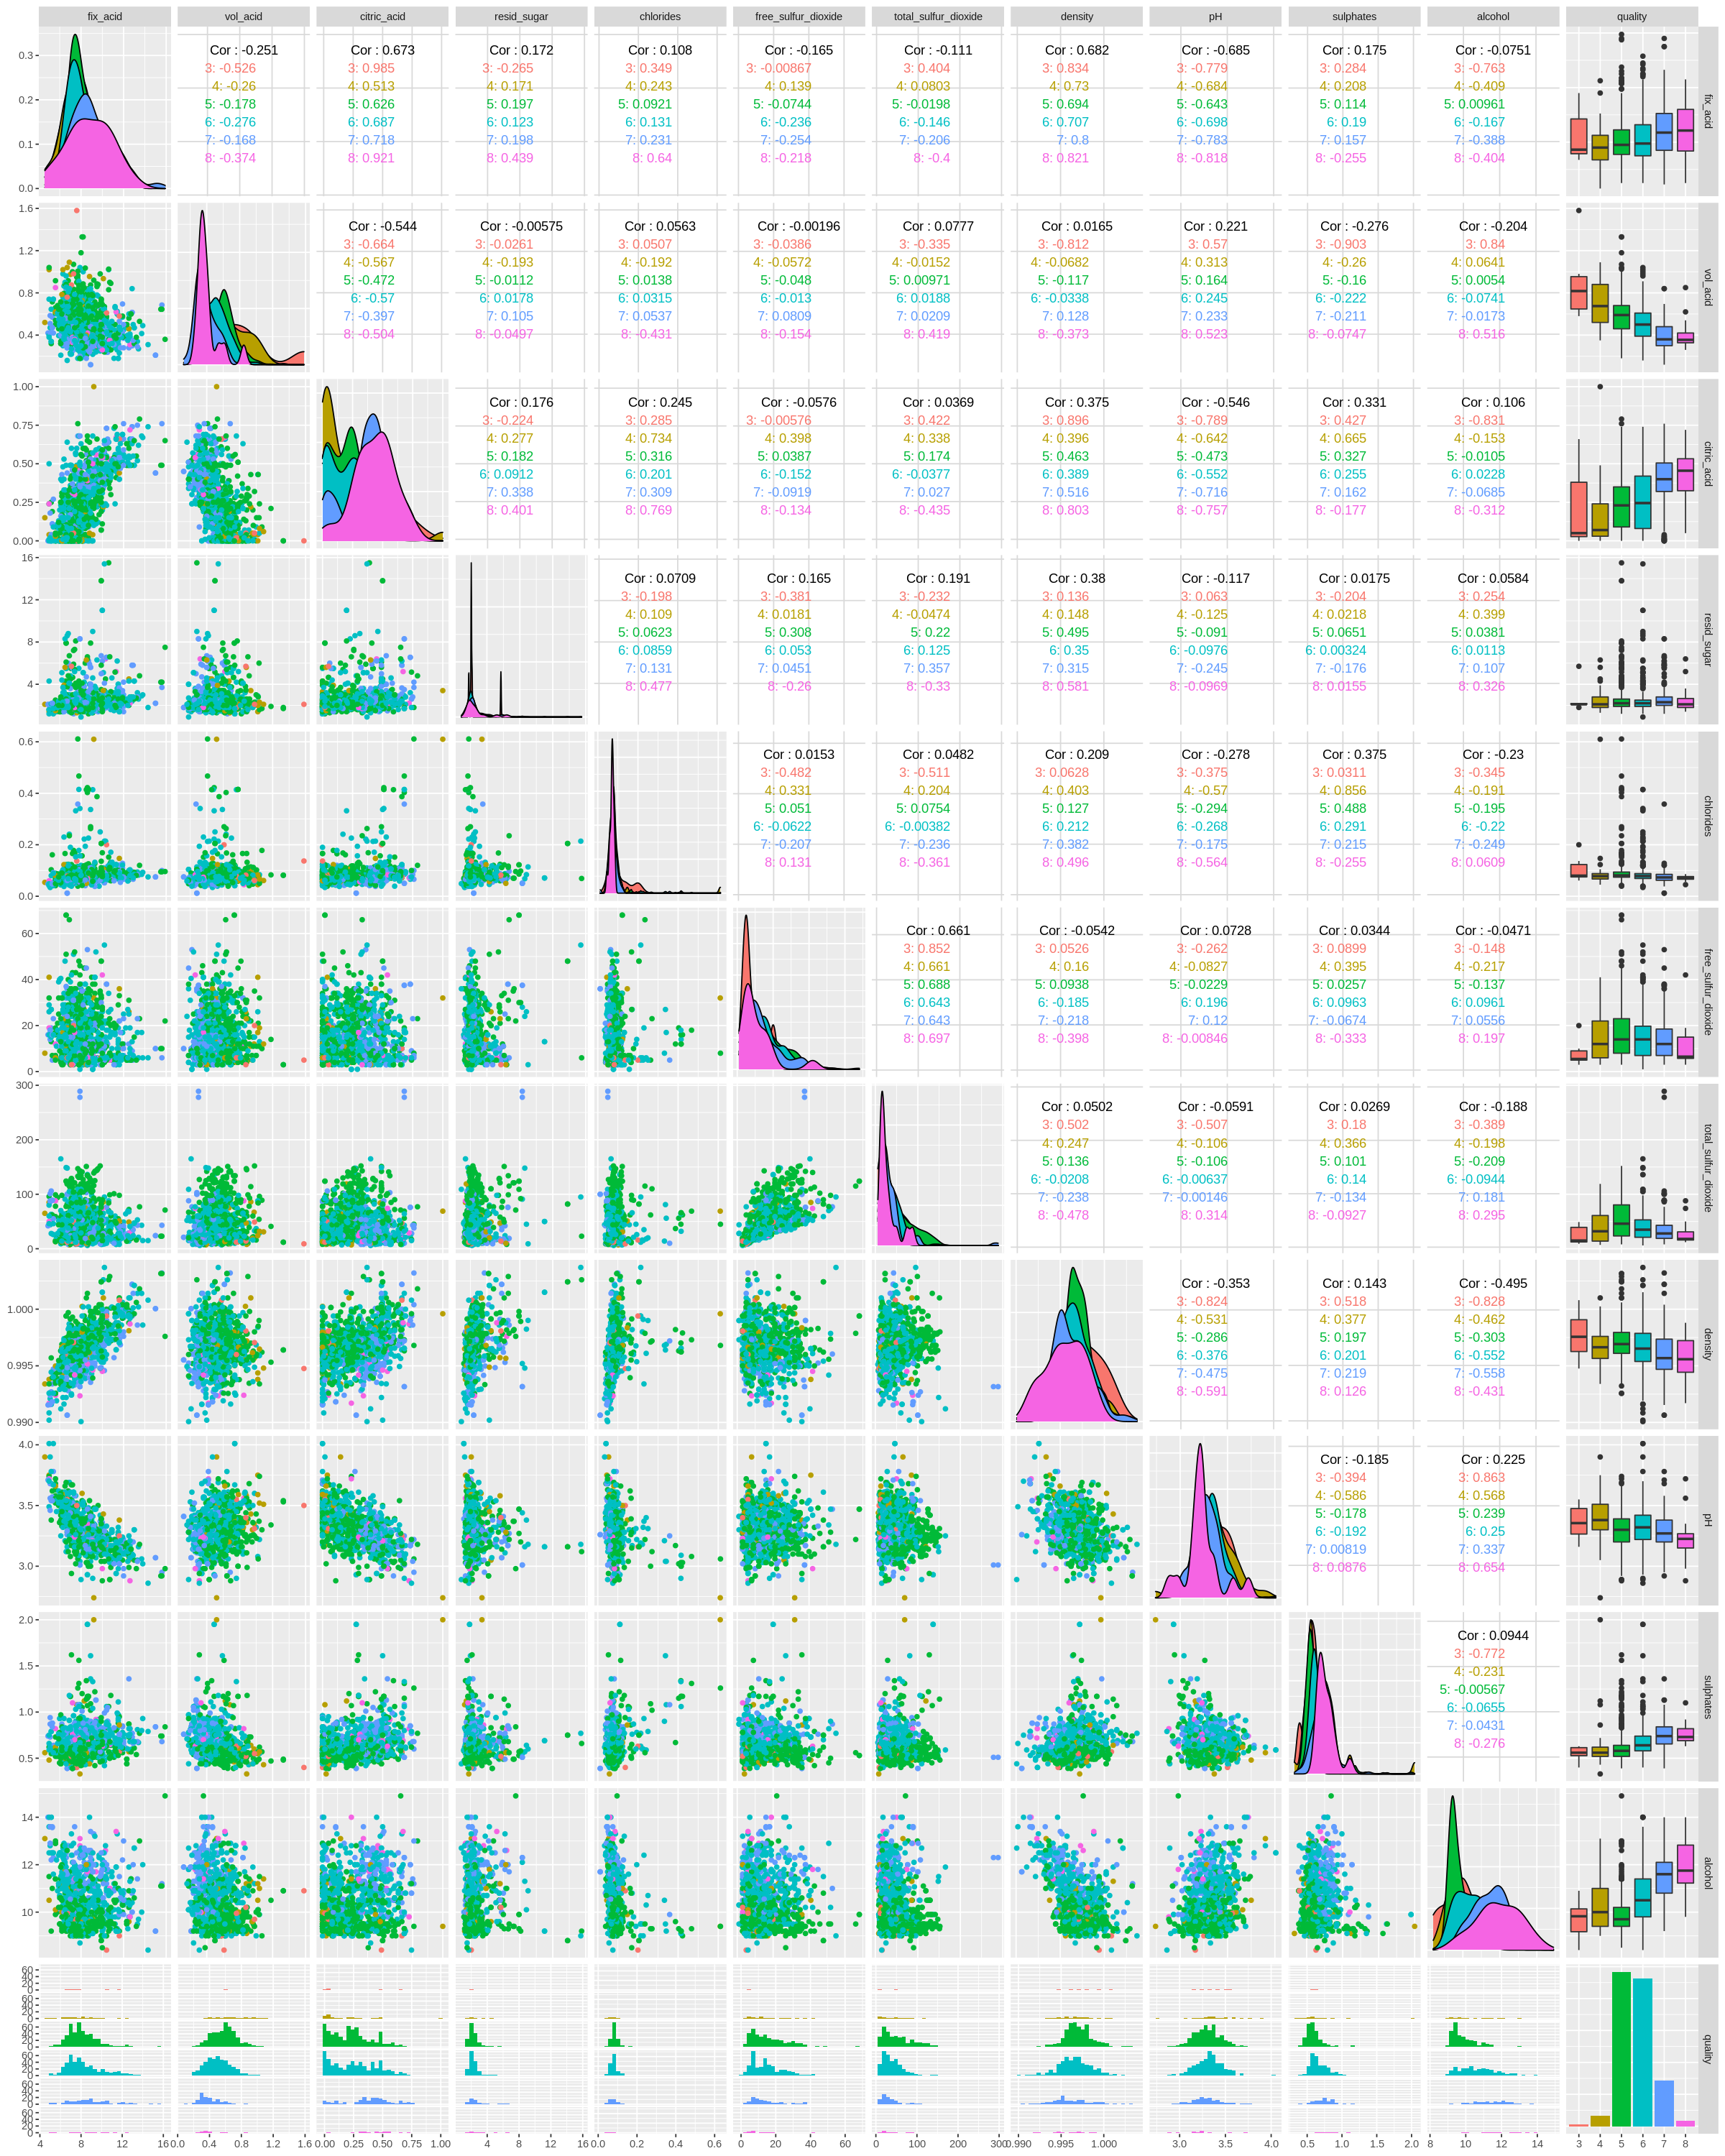

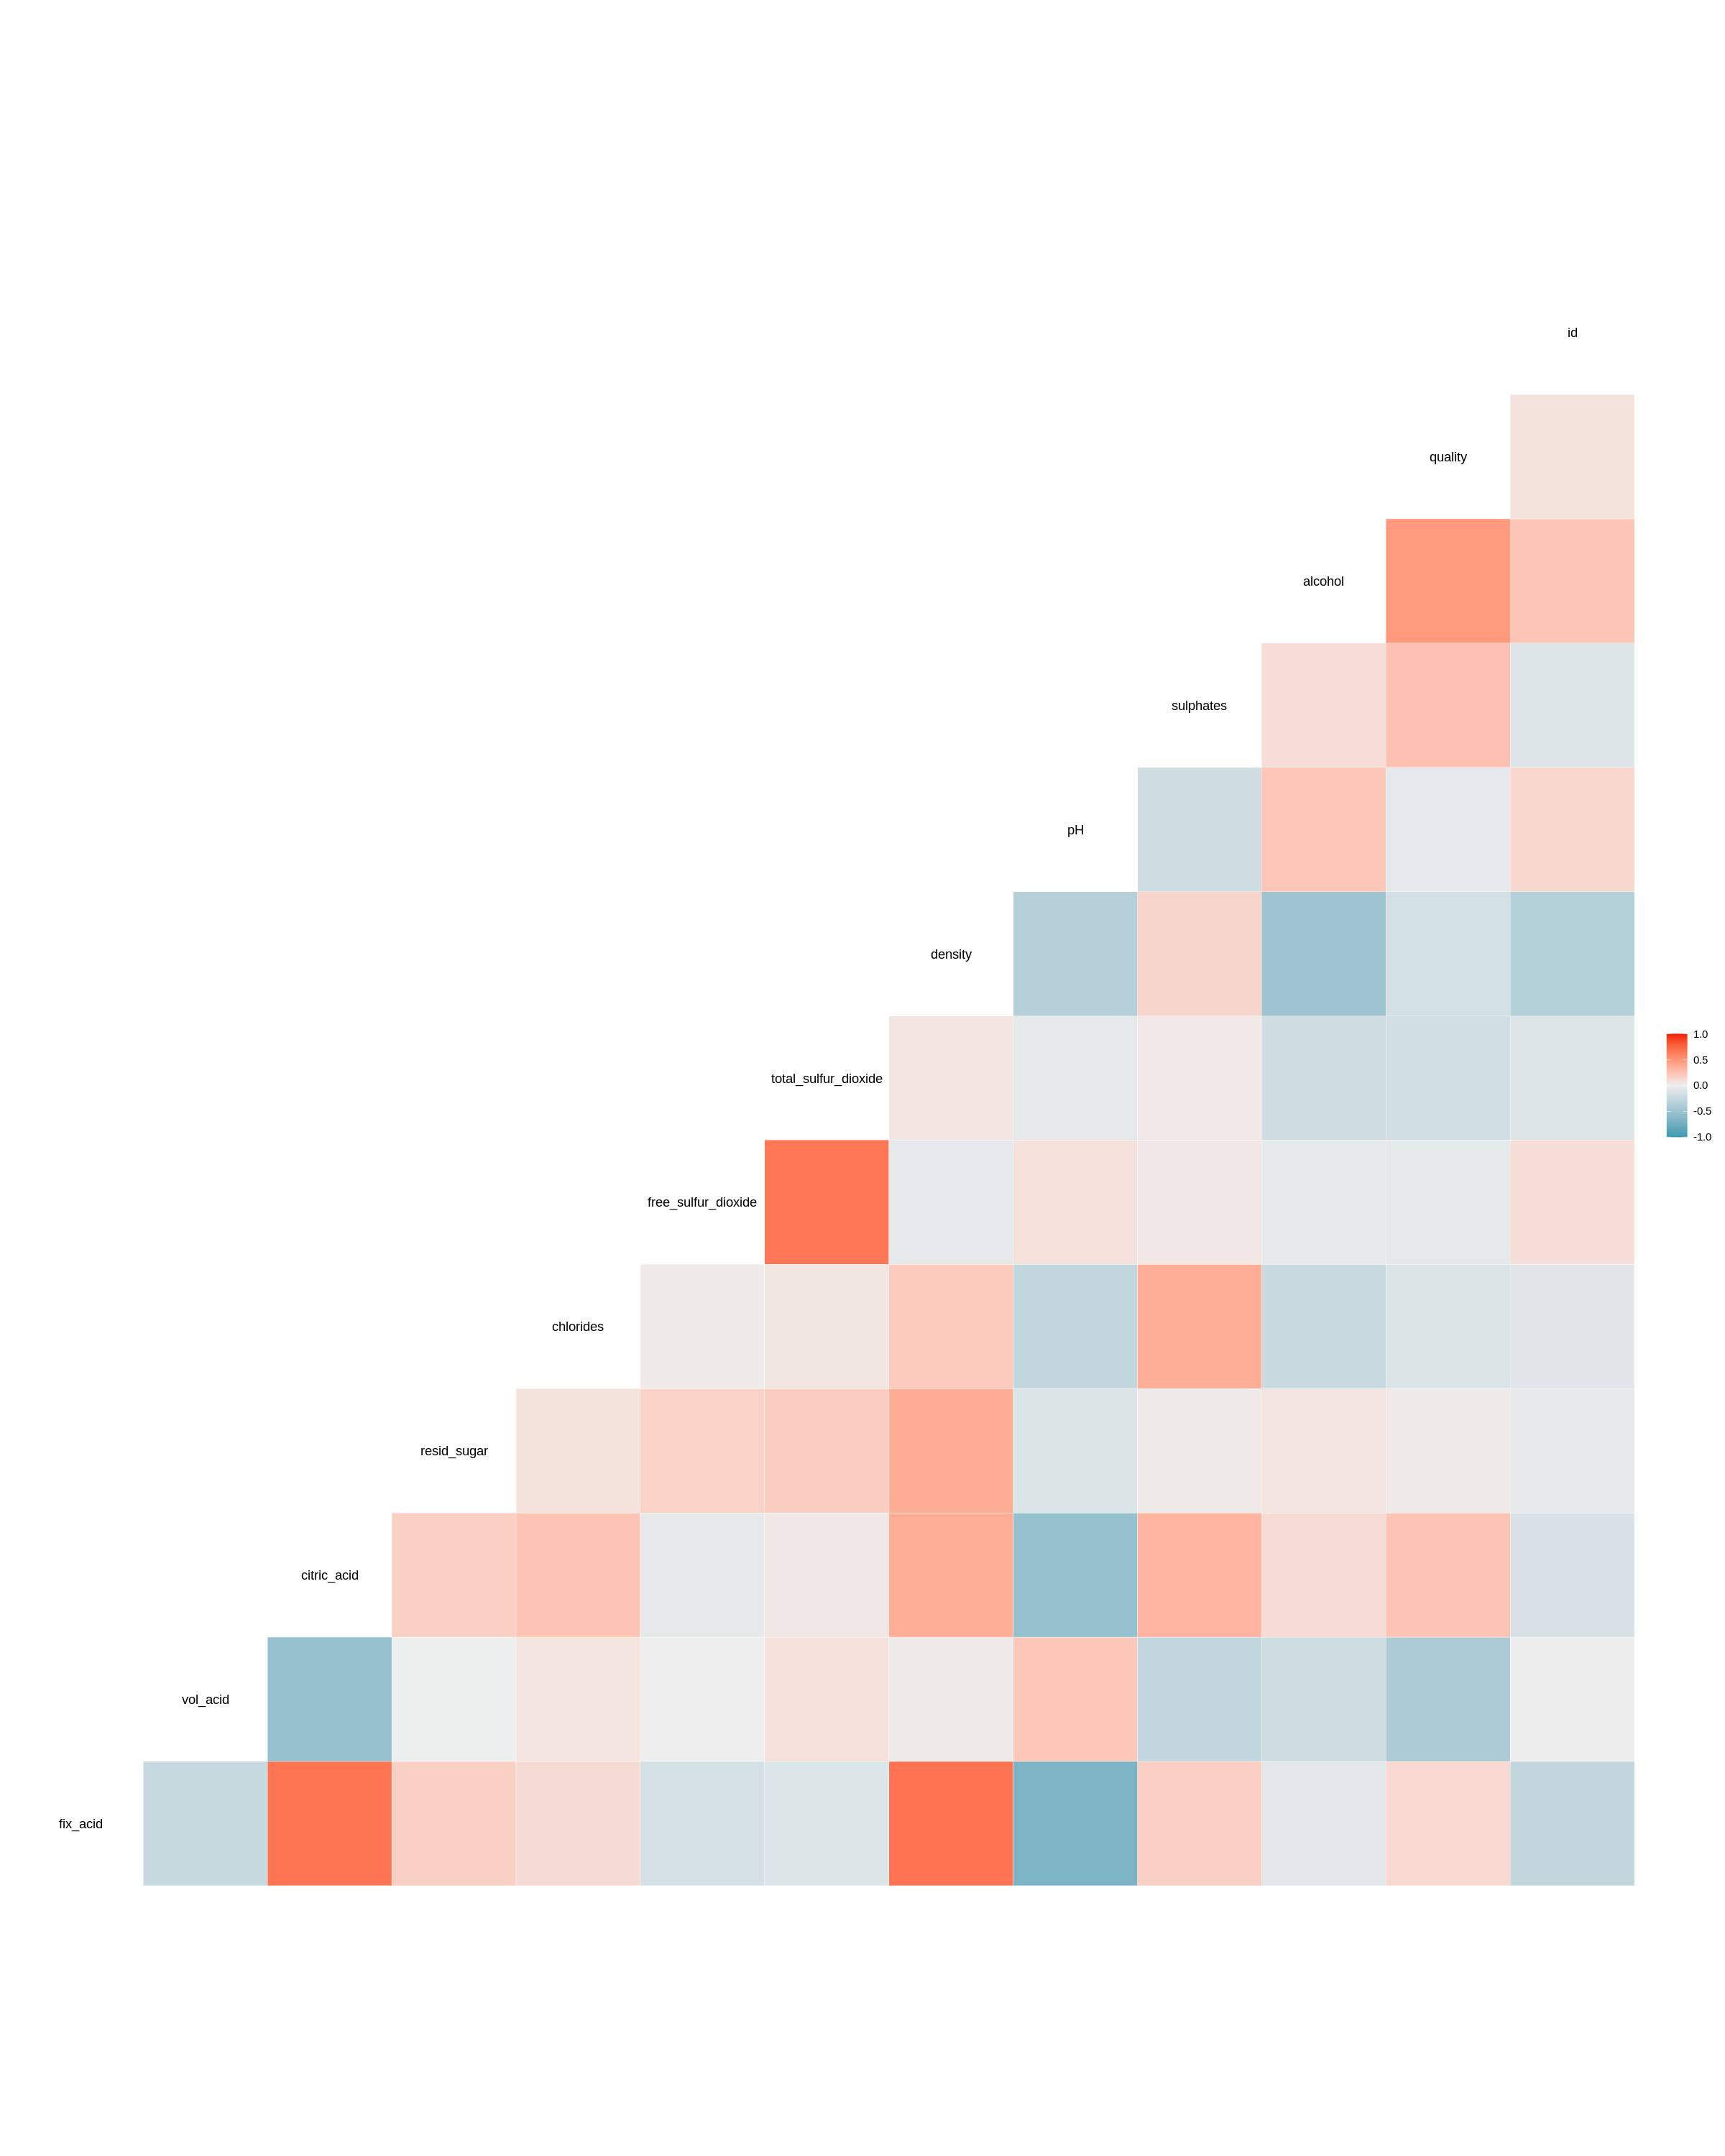

In [9]:
options(repr.plot.width = 20, repr.plot.height = 25)
wine_correlation <- dataset%>%
                    mutate(quality = as_factor(quality))%>%
                    select(-id)%>%
                    ggpairs(ggplot2 ::aes(color = quality))
wine_correlation
corr <- ggcorr(dataset, method = c("everything", "pearson")) 
corr

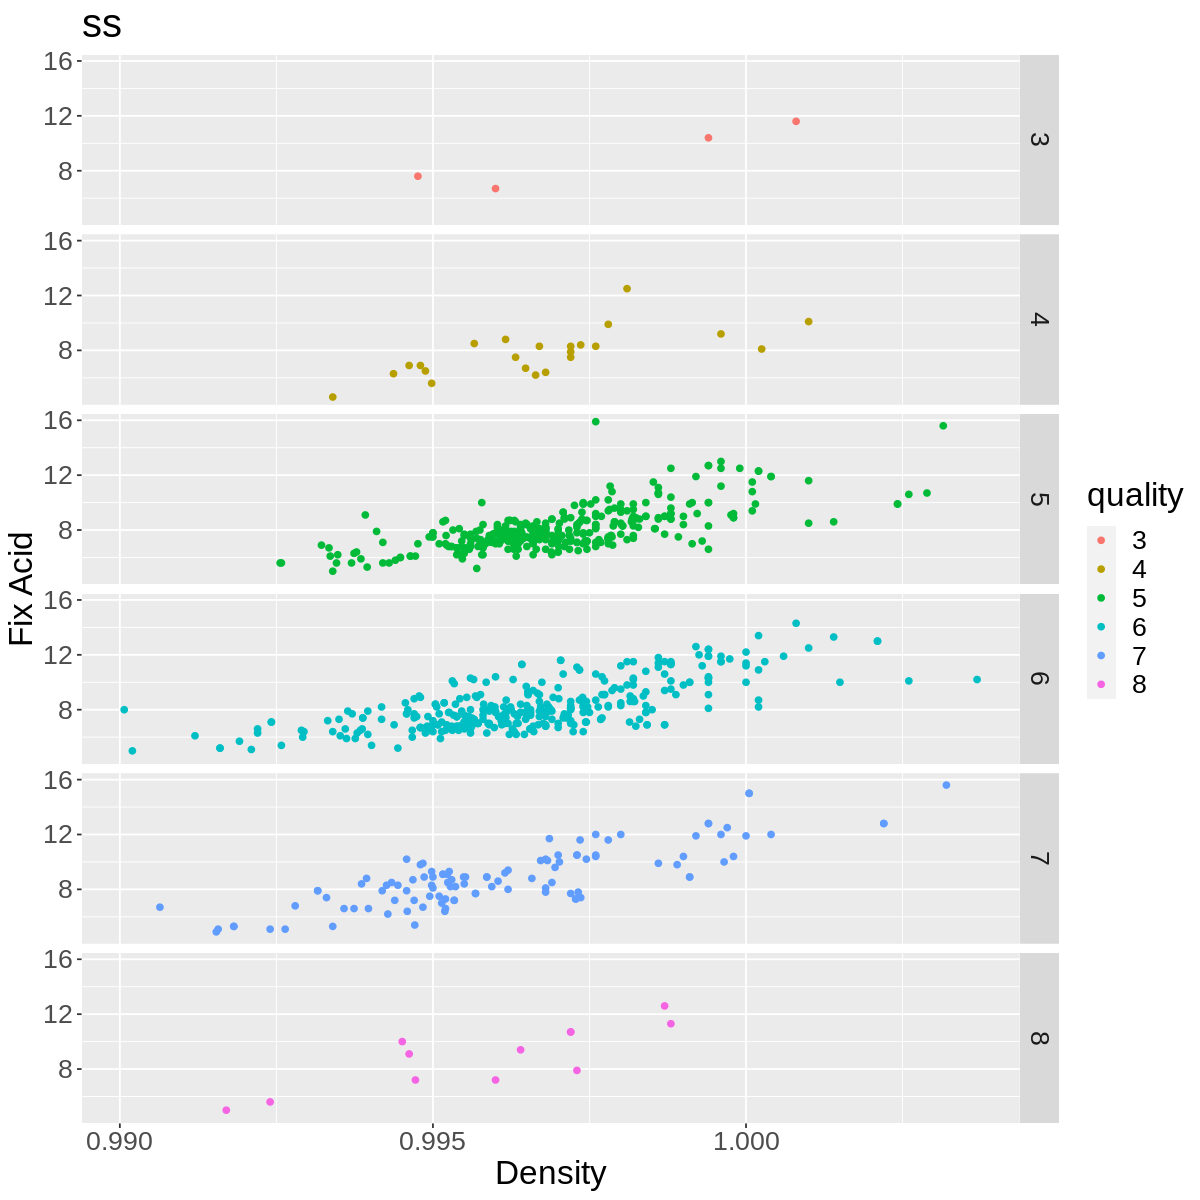

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)
scatter_overall <- wine_train%>%
                ggplot(aes(x = density, y = fix_acid, color = quality))+
                geom_point()+
                labs(x = 'Density', title = "ss", y = "Fix Acid")+
                theme(text = element_text(size = 20))+
                facet_grid(rows = vars(quality))
scatter_overall

In [13]:
#Data Analysis


! Fold1: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...



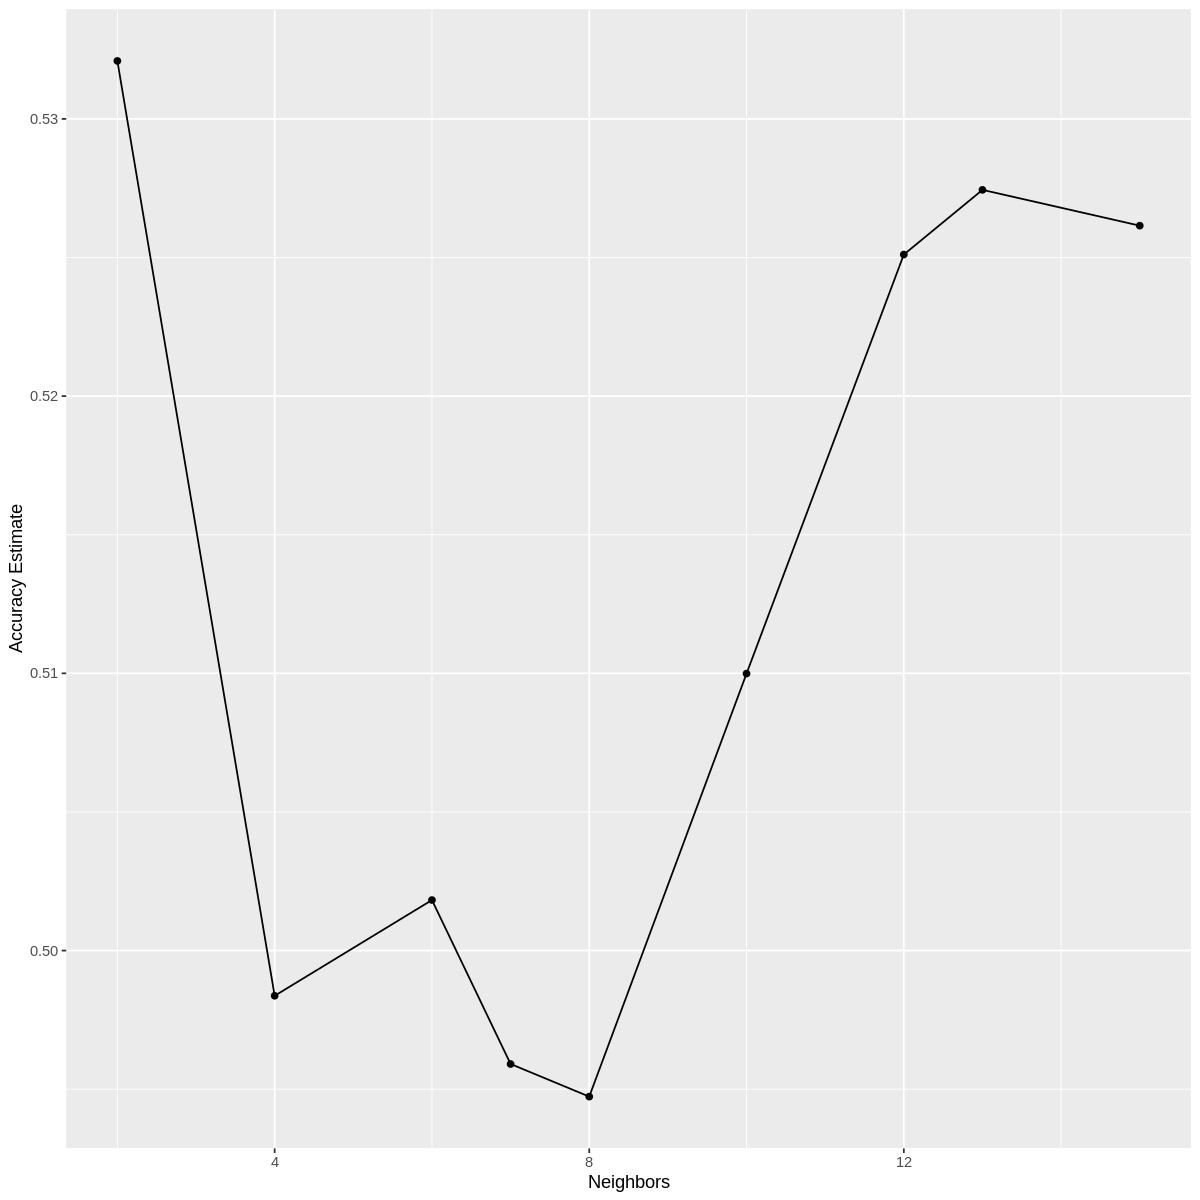

In [27]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn")%>%
            set_mode('classification')

number_recipe <- recipe(quality ~ fix_acid +citric_acid+total_sulfur_dioxide+free_sulfur_dioxide, data = wine_train)
number_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

number_fit <- workflow() %>%
            add_recipe(number_recipe) %>%
            add_model(knn_spec) %>%
            tune_grid(resample = number_vfold, grid = 10)%>%
            collect_metrics()

accuracies <- number_fit %>% 
                filter(.metric == "accuracy")
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                    geom_point()+
                    geom_line()+
                    labs(x = "Neighbors", y = "Accuracy Estimate") 
cross_val_plot

In [23]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
            set_engine("kknn")%>%
            set_mode('classification')

number_recipe <- recipe(quality ~ fix_acid +citric_acid+total_sulfur_dioxide+free_sulfur_dioxide+density, data = wine_train)

mnist_fit <- workflow() %>%
            add_recipe(number_recipe) %>%
            add_model(mnist_spec) %>%
            fit(data = wine_train)
mnist_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~9, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4772992
Best kernel: rectangular
Best k: 9

In [26]:
mnist_predictions <- predict(mnist_fit, wine_test)%>%
                    bind_cols(wine_test)
mnist_predictions

mnist_metrics <- mnist_predictions %>% 
                        metrics(truth = quality, estimate = .pred_class)
mnist_metrics
mnist_conf_mat <- mnist_predictions %>% 
        conf_mat(truth = quality, estimate = .pred_class)
mnist_conf_mat

.pred_class,id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
6,7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
5,10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,1592,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
6,1593,6.8,0.62,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
6,1594,6.2,0.60,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4788732
kap,multiclass,0.1515714


          Truth
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  0  6 71 46  6  0
         6  2  4 47 56 18  2
         7  0  0  2 11  9  2
         8  0  0  1  1  0  0